In [159]:
#Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

# Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

**Variable	Description**
* Loan_ID	Unique Loan ID
* Gender	Male/ Female
* Married	Applicant married (Y/N)
* Dependents	Number of dependents
* Education	Applicant Education (Graduate/ Under Graduate)
* Self_Employed	Self employed (Y/N)
* ApplicantIncome	Applicant income
* CoapplicantIncome	Coapplicant income
* LoanAmount	Loan amount in thousands
* Loan_Amount_Term	Term of loan in months
* Credit_History	credit history meets guidelines
* Property_Area	Urban/ Semi Urban/ Rural
* Loan_Status	(Target) Loan approved (Y/N)

**Test file:** CSV containing the customer information for whom loan eligibility is to be predicted

# ** Related Information**
It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

**Binary Classification** : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

**Multiclass Classification** : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.
Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank. This problem comes under **Binary Classification Problem**

In [160]:
# Steps for solving the problem

We will go throgh various steps to solve this problem. These steps are as below - 

1.	Problem Statement
2.	Hypothesis Generation
3.	Getting the system ready and loading the data
4.	Understanding the data
5.	Exploratory Data Analysis (EDA)

        o	Univariate Analysis
        o	Bivariate Analysis
        
6.	Missing value and outlier treatment
7.	Evaluation Metrics for classification problems
8.	Model Building : Part I
9.	Logistic Regression using stratified k-folds cross validation
10.	Feature Engineering
11.	Model Building : Part II

        o	Logistic Regression
        o	Decision tree
        o	Random Forest
        o	XGBoost



## Hypothesis Generation

This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.
Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):
* •	Salary: Applicants with high income should have more chances of loan approval.
* •	Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
* •	Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* •	Loan term: Loan for less time period and less amount should have higher chances of approval.
* •	EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval

These are the factors (not limited to ) which can be helpful in deciding whether loan should be approved or not ?

In [161]:
#Loading Packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

## Step 1 : Reading and understanding Train and Test Data set 

In [162]:
train_original = pd.read_csv("../input/loan-prediction-train-data/train_ctrUa4K.csv")
train = train_original
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [163]:
# Looking into the number of rows and columns of data set train which syas training data set have 614
#rows and 13 columns
train.shape

(614, 13)

In [164]:
#Reading the name of columns in data set 
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [165]:
test = pd.read_csv("../input/loan-prediction-test-data/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [166]:
test.shape  #

(367, 12)

In [167]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [168]:
# print data types for each variable in train data set 
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# ****We can see there are three format of data types:****
* •	object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
* •	int64: It represents the integer variables. ApplicantIncome is of this format.
* •	float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History



The shape of train data set is - (614,13) while that of test data set is (367,12). We need to predict the target variable 'Loan_Status' from the test data set.


# Step3: Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable

In [169]:
# looking for  the target variable distribution in the train data set
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [170]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

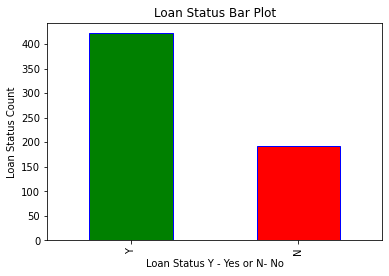

In [171]:
# Add title and axis names
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status Y - Yes or N- No')
plt.ylabel('Loan Status Count')

train['Loan_Status'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

------------------------------------------------------------------------------------------------------
# Let's visualize other features  of the data set by graph and get the analysis 
-----------------------------------------------------------------------------------------------------

## Study of categorical features such as Gender, Married, Self_Employed and Credit_History

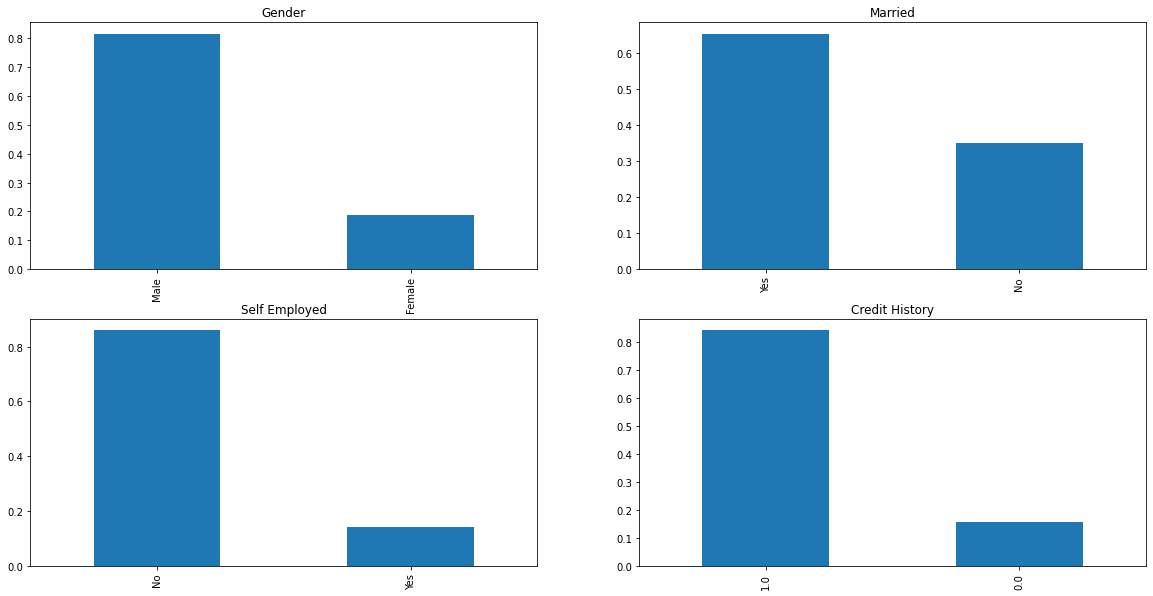

In [172]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

**It can be inferred from the above bar plots that:**
* •	80% applicants in the dataset are male.
* •	Around 65% of the applicants in the dataset are married.
* •	Around 15% applicants in the dataset are self employed.
* •	Around 85% applicants have repaid their debts.

**Now let’s visualize the ordinal variables.**



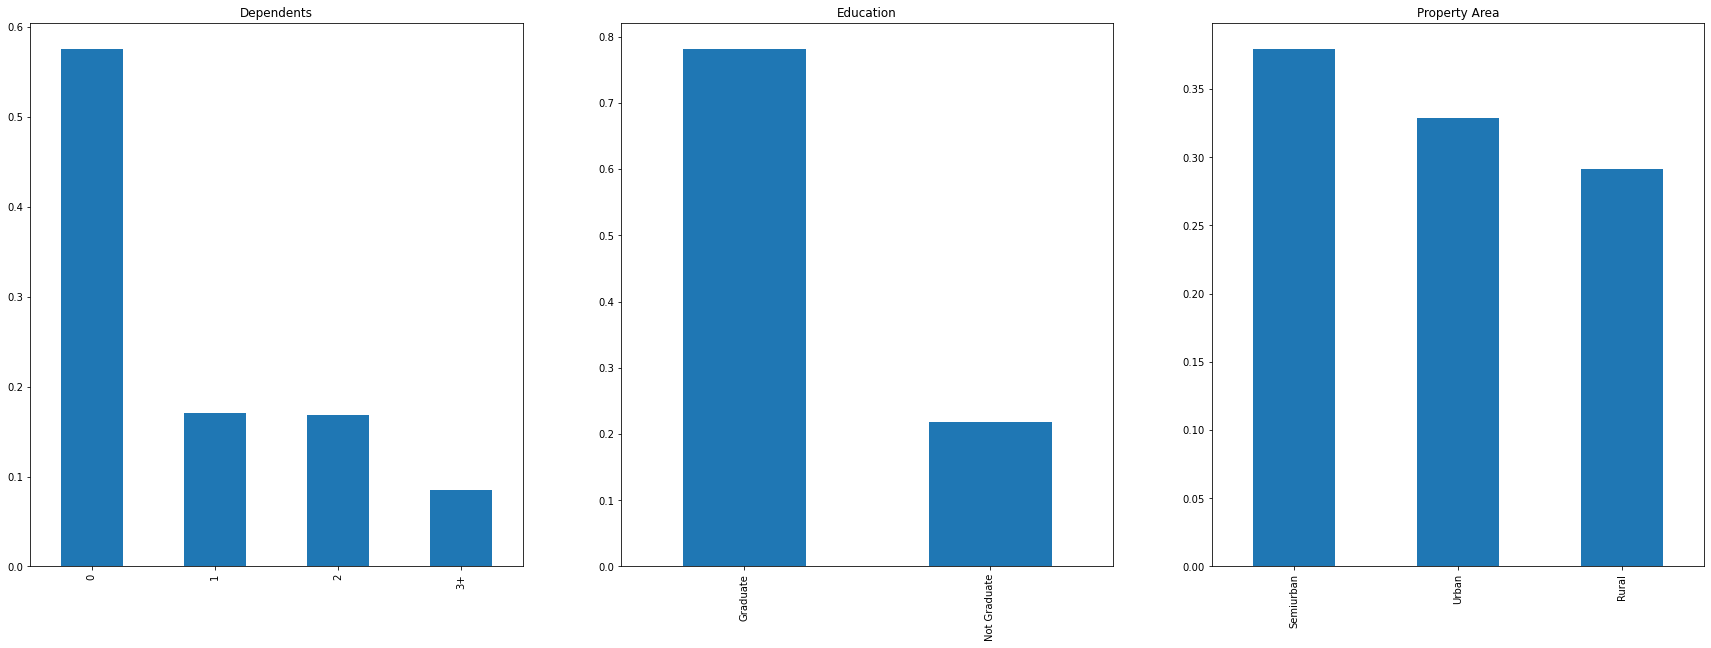

In [173]:
plt.figure(2)
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot(figsize=(30,10),kind='bar',title= 'Dependents')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot(kind='bar',title= 'Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot(kind='bar',title= 'Property Area')


**Following inferences can be made from the above bar plots:**
* •	Most of the applicants don’t have any dependents.
* •	Around 80% of the applicants are Graduate.
* •	Most of the applicants are from Semiurban area.



# Independent Variable (Numerical)

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

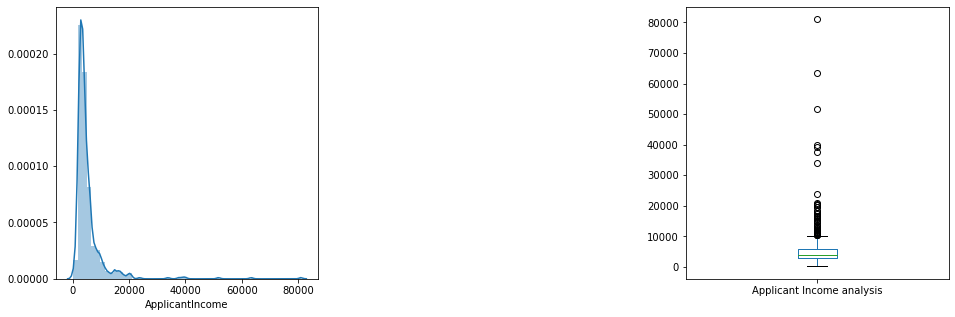

In [174]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['ApplicantIncome'],label="Applicant Income analysis")
plt.subplot(133)
train['ApplicantIncome'].plot(kind='box',figsize=(16,5),label="Applicant Income analysis")

------------------
It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education
- -----

Text(0.5, 0.98, '')

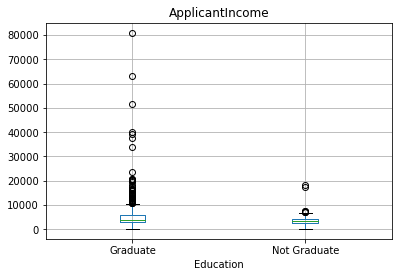

In [175]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

- --
We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.
- --

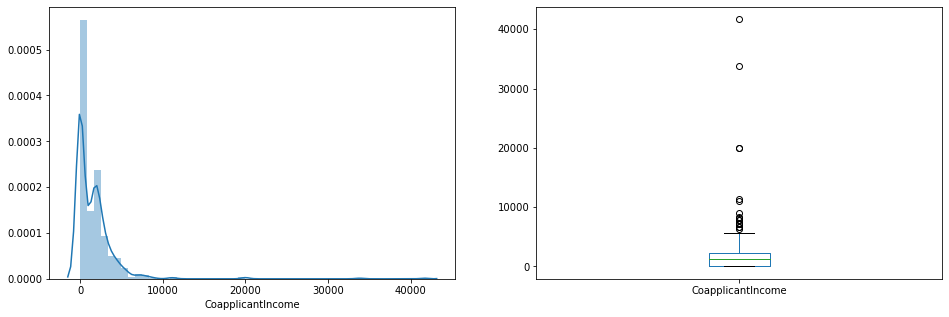

In [176]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot(kind='box', figsize=(16,5))

- --
We found simolar distribution for ApplicantIncome and CoApplicantIncome. Moreover distribution is skewed in nature . From box plot we can say in both the feature number of outliers are much . Let's look the distribution of loan amount
- --

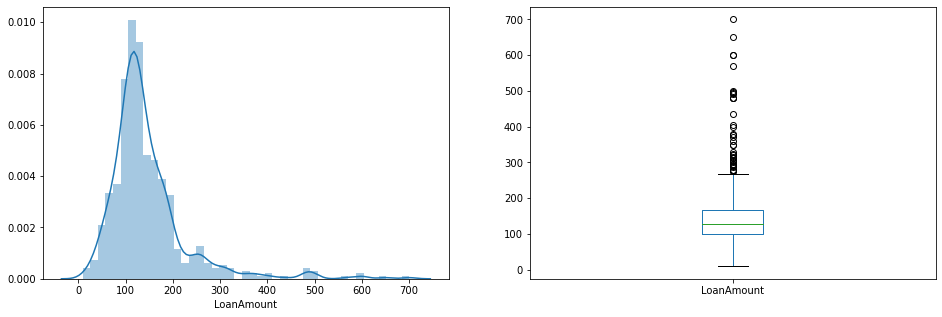

In [177]:
plt.figure()
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot(kind='box',figsize=(16,5))

- --
We see the loanamount distribution is fairly ok  but at the same time box plot says presence of outliers which we need to solve in later stage. Now we will look how well each features corelate with loan_status
- --

# **Step 4 Bivariate Analysis**

In Bivariate analysis we will analyse the independent variable with respect to target variable.

**Categorical Independent Variable vs Target Variable**

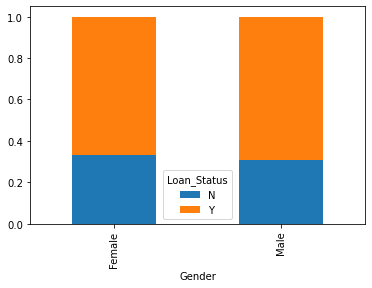

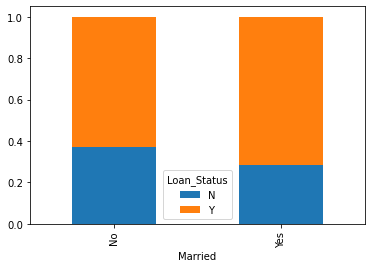

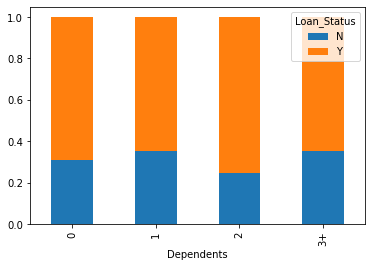

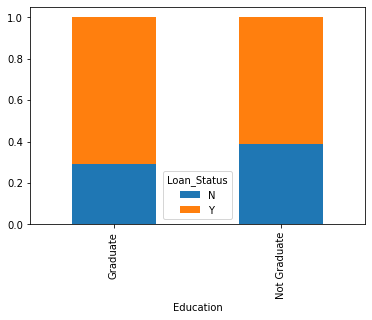

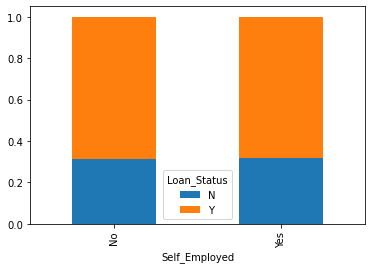

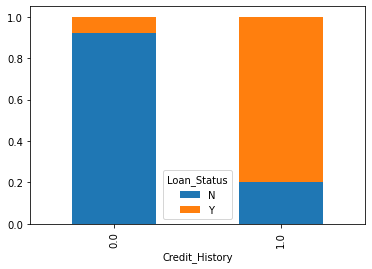

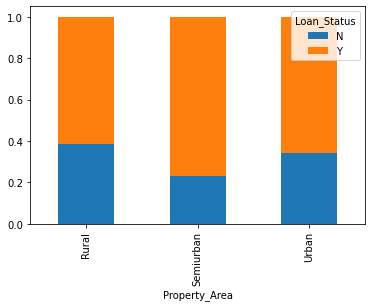

In [178]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


**Analysis done from above stacked histogram -**
1. Gender : Proportion for both male and female applicant for approved / unapproved loan are approx same.
2. Married : Proportion of Married applicant is more for approved loan
3. dependents : Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
4. Self_Employed : There is nothing significant we can infer from Self_Employed vs Loan_Status plot
5. Credit History : people with credit history as 1 are more likely to get their loans approved.
6. Property_Area : Loan approval in semiurban area is more likely than Rural and Urban area


**Numerical Independent Variable vs Target Variable**

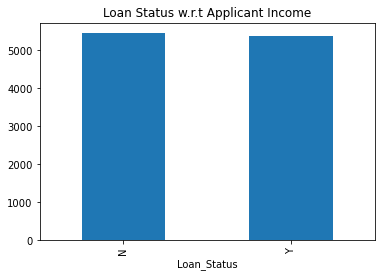

In [179]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot(kind='bar',title="Loan Status w.r.t Applicant Income")

As there are no clear inference from the loan_status with respect to Applicant Income as we don't see any change in mean income for both loan_status category. We need to make different bins for different income level. Let's create four bins as below and proceed further -

- -----
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.
- ----

In [180]:
#Declared four bins for for diff group
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Text(0, 0.5, 'Percentage')

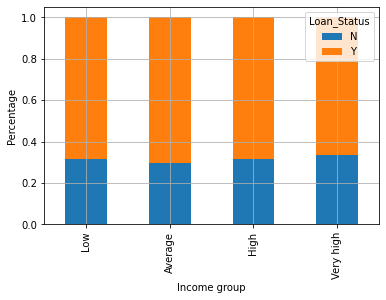

In [181]:
income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,grid=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')



It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high. We aill do the same way to loo onto coapplicant Income.

Text(0, 0.5, 'Percentage')

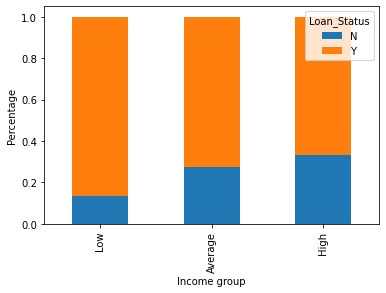

In [182]:
#train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot(kind='bar')
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Income group')
plt.ylabel('Percentage')

- -----
It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.
- ---

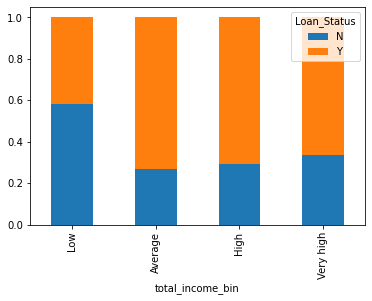

In [183]:
train['total_income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,8100]
group = ['Low','Average','High', 'Very high']
train['total_income_bin'] = pd.cut(train['total_income'],bins,labels=group)

# crosstab plot between total_income_bin vs Loasn_Status
total_income_bin = pd.crosstab(train['total_income_bin'],train['Loan_Status'])

total_income_bin.div(total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

- ---
We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

We will look into LoanAmount variable w.r.t Loan_Status now
- --

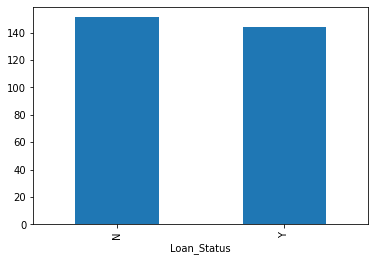

In [184]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot(kind='bar')

Text(0, 0.5, 'Percentage')

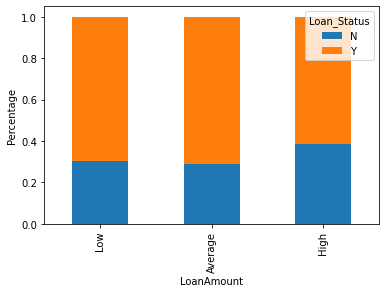

In [185]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

- --
It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.
- --

In [186]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'total_income',
       'total_income_bin', 'LoanAmount_bin'],
      dtype='object')

In [187]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'total_income_bin', 'LoanAmount_bin', 'total_income'], axis=1)

In [188]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)


Now we will draw correltion between all the numeric varables . We will use the heat map to visualoize teh corelation. 

** Variable with daarker color represents more correlation 

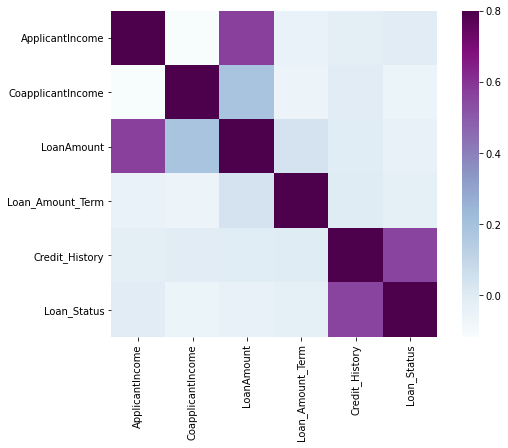

In [189]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

----
We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.
- --

# Missing Value and Outlier Treatment

In [190]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have missing values for Gender,Married, Dependents, Self_Employed etc as per above data . We can consider these methods to fill the missing values:

1. For numerical variables: imputation using mean or median
2. For categorical variables: imputation using mode


In [191]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

#----------- For Test Data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [192]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [193]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [194]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True) 
# Replaced null value by Median as mean won't be best representative as outliers are there

In [195]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**In** above step we had found the more outlier values for variable LoanAmount. it was right skewed . I will try to make the distribtion normal by taking logarithmic values of LoanAmount field 

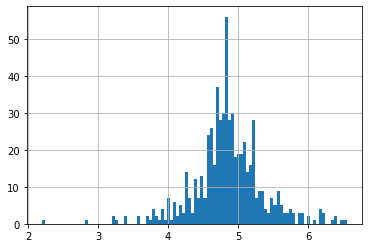

In [196]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=100) 
#Below graph is approx normal distributed. For the test data set also we need to take log of LoanAmount field 
#to make the distribution normal
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# **Model Building Part I**

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.
- ----
**FYI:**
* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
* This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function
- ---

In [197]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [198]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

---------------
We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.
- --------------

In [199]:
x = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

In [200]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

-----------------
Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female. Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.
- --------


In [201]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [202]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
# x_cv and y_cv is validation data set component
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [204]:
#Let’s predict the Loan_Status for validation set and calculate its accuracy.
pred_cv = model.predict(x_cv)

accuracy_score(y_cv,pred_cv)

0.7891891891891892

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [205]:
pred_test = model.predict(test)


In [206]:
#Lets import result from test file.

submission=pd.read_csv("../input/submission/sample_submission_49d68Cx.csv")

In [207]:
test_original = pd.read_csv("../input/loan-prediction-test-data/test_lAUu6dG.csv")
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [208]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [209]:
#converting submission fiel to csv file
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

# **Logistic Regression using stratified k-folds cross validation**

In [210]:
#Let’s import StratifiedKFold from sklearn and fit the model.
from sklearn.model_selection import StratifiedKFold
i = 1
accuracy = []

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
#skf.get_n_splits(x,y)

for train_index,test_index in skf.split(x,y):
    #print("train: ",train_index," Validation : ",test_index)
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    x1_train,x1_val = x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_val = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(max_iter=200 ,random_state=1)
    model.fit(x1_train,y1_train)
    prediction_test = model.predict(x1_val)
    score = accuracy_score(y1_val,prediction_test)
    print('accuracy_score',score)
    i+=1 
    pred_test = model.predict(test) 
    #print("pred_test",pred_test)
    pred=model.predict_proba(x1_val)[:,1]
    #print("pred",pred)
    
#print(score)



1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


**Let us visualize the roc curve.**

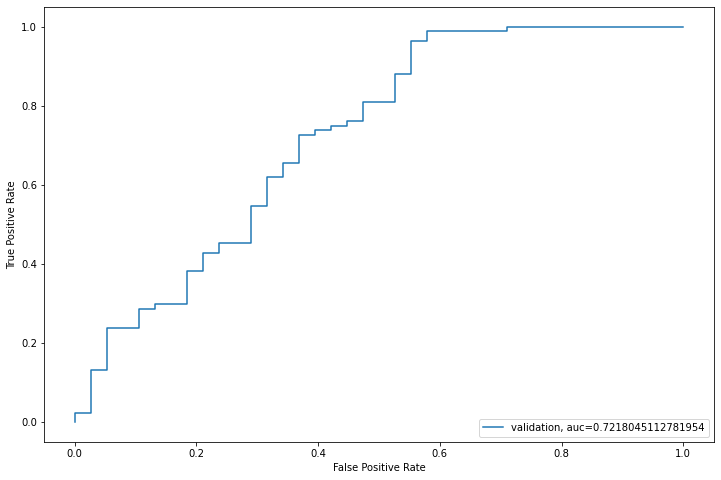

In [211]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y1_val, pred)
auc = metrics.roc_auc_score(y1_val,pred)
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [212]:
#We got an auc value of 0.721

submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistickfold.csv',index=False)

In [213]:
submission.head

<bound method NDFrame.head of       Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]>

Using this we found our result were classifying only 78% in right category .

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

* EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

* Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [214]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

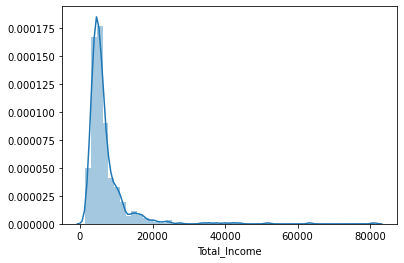

In [215]:
#Let’s check the distribution of Total Income.

sns.distplot(train['Total_Income']);


----------
We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

- -----

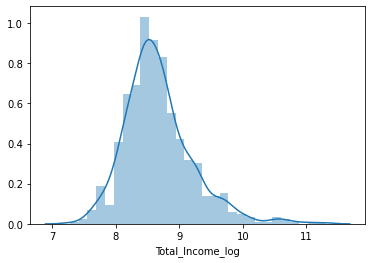

In [216]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])


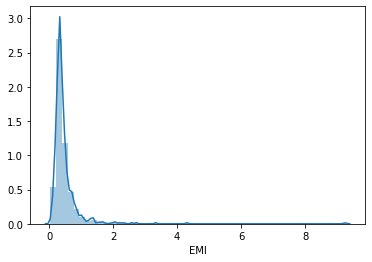

In [217]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

#Let’s check the distribution of EMI variable.

sns.distplot(train['EMI']);

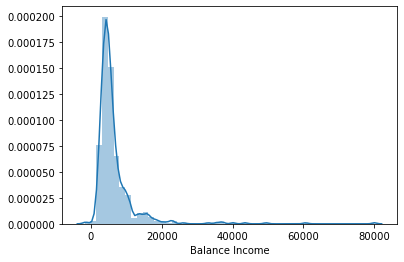

In [218]:
# us create Balance Income feature now and check its distribution.

train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);


In [219]:
train_final=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test_final=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# **The new model for this will be coming soon** 